In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from torchvision import transforms
import seaborn as sns

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(type="right", max_files= 30_000)

Processing Data: 100%|██████████| 30000/30000 [02:04<00:00, 240.75image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(
    dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True
)
train_subset, test_subset, val_subset = random_split(loader.dataset, [0.7, 0.2, 0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.GaussianBlur(kernel_size=3),
        transforms.RandomGrayscale(p=0.1),
        transforms.RandomPosterize(bits=4, p=0.1),
        transforms.RandomSolarize(threshold=128, p=0.1),
        transforms.RandomEqualize(p=0.1),
        transforms.ToTensor(),
    ]
)

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input * 255) / 255
    # new_input.show()
    # break
    train_subset.dataset.data[idx] = (new_input, label)

100%|██████████| 21000/21000 [05:31<00:00, 63.39it/s]


In [5]:
train = DataLoader(
    train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True
)
test = DataLoader(
    test_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True
)
val = DataLoader(
    val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True
)

# Training

In [6]:
saved_models = []
t_info = {}

In [7]:
model = models.OccModel()
training_info = model.train_model(train, test, epochs=60, early_stopping_patience=10, learning_rate=10**-4)
torch.save(
    model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt"
)
# t_info.append(training_info)
t_info["Right Hand - L1"] = training_info
saved_models.append(model)


Epoch 1/60 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.48it/s]


Loss: 2.400072, Mean Absolute Error: 0.05896329580548596, Time remaining: 2:25:01.605029


Epoch 2/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.061298, Mean Absolute Error: 0.04729691334068775, Time remaining: 2:17:58.641484


Epoch 3/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.862105, Mean Absolute Error: 0.040251169036677546, Time remaining: 2:14:05.012091


Epoch 4/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.757530, Mean Absolute Error: 0.033995170037242325, Time remaining: 2:10:56.551696


Epoch 5/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.683753, Mean Absolute Error: 0.035797994732460446, Time remaining: 2:08:10.095050


Epoch 6/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.621879, Mean Absolute Error: 0.03002222179573901, Time remaining: 2:05:31.708104


Epoch 7/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.583875, Mean Absolute Error: 0.029510099084136335, Time remaining: 2:02:54.366576


Epoch 8/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.548106, Mean Absolute Error: 0.02848574645975803, Time remaining: 2:00:22.823556


Epoch 9/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.532580, Mean Absolute Error: 0.03059247501709677, Time remaining: 1:57:56.671311


Epoch 10/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.499493, Mean Absolute Error: 0.028769085272908845, Time remaining: 1:55:30.007950


Epoch 11/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.481938, Mean Absolute Error: 0.025990841771535416, Time remaining: 1:53:07.133815


Epoch 12/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.478272, Mean Absolute Error: 0.02825758677530796, Time remaining: 1:50:45.168576


Epoch 13/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.468601, Mean Absolute Error: 0.02578094616492695, Time remaining: 1:48:22.819796


Epoch 14/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.446404, Mean Absolute Error: 0.028103322335617974, Time remaining: 1:46:01.122236


Epoch 15/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.436844, Mean Absolute Error: 0.028230198252787615, Time remaining: 1:43:40.062090


Epoch 16/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.437872, Mean Absolute Error: 0.025755537525215682, Time remaining: 1:41:18.752548


Epoch 17/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.426420, Mean Absolute Error: 0.02296316200629511, Time remaining: 1:38:57.790192


Epoch 18/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.414432, Mean Absolute Error: 0.02389189823867476, Time remaining: 1:36:39.823050


Epoch 19/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.397987, Mean Absolute Error: 0.02613416809509409, Time remaining: 1:34:20.003547


Epoch 20/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.398865, Mean Absolute Error: 0.023288171292540242, Time remaining: 1:32:00.450280


Epoch 21/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.382796, Mean Absolute Error: 0.023775930942452336, Time remaining: 1:29:41.130456


Epoch 22/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.379722, Mean Absolute Error: 0.021939624155415817, Time remaining: 1:27:22.096656


Epoch 23/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.377763, Mean Absolute Error: 0.02221303943921118, Time remaining: 1:25:02.873759


Epoch 24/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.371522, Mean Absolute Error: 0.023263159970891602, Time remaining: 1:22:43.940604


Epoch 25/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.358222, Mean Absolute Error: 0.02589555292766779, Time remaining: 1:20:24.908200


Epoch 26/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.357527, Mean Absolute Error: 0.02259061524168925, Time remaining: 1:18:06.403668


Epoch 27/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.355190, Mean Absolute Error: 0.023485203025902204, Time remaining: 1:15:47.889687


Epoch 28/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.346212, Mean Absolute Error: 0.023484186606204258, Time remaining: 1:13:29.927424


Epoch 29/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.67it/s]


Loss: 0.334687, Mean Absolute Error: 0.023287706116729593, Time remaining: 1:11:11.453141


Epoch 30/60 (Training): 100%|██████████| 329/329 [02:07<00:00,  2.58it/s]


Loss: 0.336437, Mean Absolute Error: 0.023225438543298144, Time remaining: 1:08:57.730530


Epoch 31/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.334501, Mean Absolute Error: 0.022331260848156315, Time remaining: 1:06:39.018887


Epoch 32/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.335211, Mean Absolute Error: 0.02250896820778701, Time remaining: 1:04:20.664528


Epoch 33/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.329699, Mean Absolute Error: 0.02003169180627199, Time remaining: 1:02:02.222781


Epoch 34/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.319618, Mean Absolute Error: 0.021232745753838978, Time remaining: 0:59:43.927932


Epoch 35/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.317953, Mean Absolute Error: 0.022130939207891834, Time remaining: 0:57:25.983200


Epoch 36/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.316898, Mean Absolute Error: 0.01992530393552907, Time remaining: 0:55:07.691304


Epoch 37/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.311945, Mean Absolute Error: 0.020671260607567556, Time remaining: 0:52:49.682279


Epoch 38/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.303957, Mean Absolute Error: 0.02025862670741341, Time remaining: 0:50:31.877420


Epoch 39/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.308158, Mean Absolute Error: 0.022309613433924128, Time remaining: 0:48:13.736979


Epoch 40/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.299920, Mean Absolute Error: 0.0228596882141651, Time remaining: 0:45:55.592980


Epoch 41/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.293065, Mean Absolute Error: 0.021888458665381087, Time remaining: 0:43:37.535988


Epoch 42/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.293995, Mean Absolute Error: 0.02132178626043048, Time remaining: 0:41:19.608900


Epoch 43/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.293547, Mean Absolute Error: 0.022216484644153017, Time remaining: 0:39:01.846611


Epoch 44/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.289871, Mean Absolute Error: 0.020948403445567858, Time remaining: 0:36:44.017744


Epoch 45/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.287881, Mean Absolute Error: 0.023585082933385956, Time remaining: 0:34:26.081940


Epoch 46/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.67it/s]


Loss: 0.286691, Mean Absolute Error: 0.022063836019406927, Time remaining: 0:32:08.184048


Epoch 47/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.288090, Mean Absolute Error: 0.022008926597760714, Time remaining: 0:29:50.410557


Epoch 48/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.280125, Mean Absolute Error: 0.0206542067982732, Time remaining: 0:27:32.760372


Epoch 49/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.276037, Mean Absolute Error: 0.019018833698863362, Time remaining: 0:25:14.948094


Epoch 50/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.273164, Mean Absolute Error: 0.019266420995142867, Time remaining: 0:22:57.170750


Epoch 51/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.277618, Mean Absolute Error: 0.020323232663399044, Time remaining: 0:20:39.496236


Epoch 52/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.63it/s]


Loss: 0.271758, Mean Absolute Error: 0.020171250806170257, Time remaining: 0:18:21.997216


Epoch 53/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.265225, Mean Absolute Error: 0.021182515103607736, Time remaining: 0:16:04.240291


Epoch 54/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.273226, Mean Absolute Error: 0.020299342743299427, Time remaining: 0:13:46.460982


Epoch 55/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.273173, Mean Absolute Error: 0.021548964628117517, Time remaining: 0:11:28.704630


Epoch 56/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.270750, Mean Absolute Error: 0.020978008872492515, Time remaining: 0:09:10.961808


Epoch 57/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.233719, Mean Absolute Error: 0.018636961026672037, Time remaining: 0:06:53.207031


Epoch 58/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 0.223517, Mean Absolute Error: 0.016896691777683954, Time remaining: 0:04:35.470562


Epoch 59/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.215346, Mean Absolute Error: 0.01800173103928249, Time remaining: 0:02:17.731468


Epoch 60/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.208283, Mean Absolute Error: 0.018503441262316515, Time remaining: 0:00:00


In [8]:
model = models.OccModel()
training_info = model.train_model(train, test, epochs=60, early_stopping_patience=10, learning_rate=10**-4, loss_type="a")
torch.save(
    model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt"
)
# t_info.append(training_info)
t_info["Right Hand - Angle"] = training_info
saved_models.append(model)


Epoch 1/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 4.165906, Mean Absolute Error: 0.1004799873112364, Time remaining: 2:21:34.397678


Epoch 2/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.835527, Mean Absolute Error: 0.08630221293486179, Time remaining: 2:18:55.510774


Epoch 3/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.551373, Mean Absolute Error: 0.05954753454933141, Time remaining: 2:16:26.071758


Epoch 4/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 1.295852, Mean Absolute Error: 0.05067599796630601, Time remaining: 2:14:05.120944


Epoch 5/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.258892, Mean Absolute Error: 0.0511153933611956, Time remaining: 2:11:39.172490


Epoch 6/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 1.099370, Mean Absolute Error: 0.05271379978574337, Time remaining: 2:09:18.475488


Epoch 7/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.988758, Mean Absolute Error: 0.04217580024232256, Time remaining: 2:06:52.210595


Epoch 8/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.912037, Mean Absolute Error: 0.0411401009385256, Time remaining: 2:04:25.582904


Epoch 9/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.829446, Mean Absolute Error: 0.03854848622800188, Time remaining: 2:02:00.899142


Epoch 10/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.753890, Mean Absolute Error: 0.03328388853077876, Time remaining: 1:59:36.288400


Epoch 11/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.730529, Mean Absolute Error: 0.031968153775372404, Time remaining: 1:57:12.183011


Epoch 12/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.701603, Mean Absolute Error: 0.032993449453026694, Time remaining: 1:54:47.168880


Epoch 13/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 0.669104, Mean Absolute Error: 0.03126762119775757, Time remaining: 1:52:24.772224


Epoch 14/60 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.596625, Mean Absolute Error: 0.029089240159126038, Time remaining: 1:50:04.522772


Epoch 15/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.574987, Mean Absolute Error: 0.029001046031554963, Time remaining: 1:47:39.748380


Epoch 16/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.556230, Mean Absolute Error: 0.026650421787053347, Time remaining: 1:45:15.470700


Epoch 17/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.543107, Mean Absolute Error: 0.026661781732864837, Time remaining: 1:42:51.258219


Epoch 18/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.533517, Mean Absolute Error: 0.032401696134834214, Time remaining: 1:40:27.021084


Epoch 19/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.515389, Mean Absolute Error: 0.02841289151222148, Time remaining: 1:38:02.827682


Epoch 20/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.512842, Mean Absolute Error: 0.024671299115536695, Time remaining: 1:35:38.556240


Epoch 21/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.481270, Mean Absolute Error: 0.024791560750058356, Time remaining: 1:33:13.823898


Epoch 22/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.473315, Mean Absolute Error: 0.02942707453002321, Time remaining: 1:30:50.142438


Epoch 23/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.494571, Mean Absolute Error: 0.02585746065535127, Time remaining: 1:28:26.534487


Epoch 24/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 0.488402, Mean Absolute Error: 0.025056658134339972, Time remaining: 1:26:03.438384


Epoch 25/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.443034, Mean Absolute Error: 0.023533297504516357, Time remaining: 1:23:38.763295


Epoch 26/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.445504, Mean Absolute Error: 0.02461041301052938, Time remaining: 1:21:15.565966


Epoch 27/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.428146, Mean Absolute Error: 0.023853168297717546, Time remaining: 1:18:51.389256


Epoch 28/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.433682, Mean Absolute Error: 0.02453094244280711, Time remaining: 1:16:27.764256


Epoch 29/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.419204, Mean Absolute Error: 0.023003273782260875, Time remaining: 1:14:04.005155


Epoch 30/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.425310, Mean Absolute Error: 0.023245121243389996, Time remaining: 1:11:39.881640


Epoch 31/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.401332, Mean Absolute Error: 0.024347825332524928, Time remaining: 1:09:16.214982


Epoch 32/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.395699, Mean Absolute Error: 0.02246254984725346, Time remaining: 1:06:52.593592


Epoch 33/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.402885, Mean Absolute Error: 0.021373905528812333, Time remaining: 1:04:28.864749


Epoch 34/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.390720, Mean Absolute Error: 0.026755595936420115, Time remaining: 1:02:05.125534


Epoch 35/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.464848, Mean Absolute Error: 0.023276450667292514, Time remaining: 0:59:41.685725


Epoch 36/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.379974, Mean Absolute Error: 0.02555796777472851, Time remaining: 0:57:18.213960


Epoch 37/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.505009, Mean Absolute Error: 0.025523158909871856, Time remaining: 0:54:54.852005


Epoch 38/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.392959, Mean Absolute Error: 0.02322314200090601, Time remaining: 0:52:31.332910


Epoch 39/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.369108, Mean Absolute Error: 0.022426118108225947, Time remaining: 0:50:08.103588


Epoch 40/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.355420, Mean Absolute Error: 0.02133824004534077, Time remaining: 0:47:44.757180


Epoch 41/60 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.383683, Mean Absolute Error: 0.022221391782798666, Time remaining: 0:45:22.382358


Epoch 42/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.344448, Mean Absolute Error: 0.020781752460220074, Time remaining: 0:42:58.934304


Epoch 43/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.346345, Mean Absolute Error: 0.021177459191134635, Time remaining: 0:40:35.446333


Epoch 44/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.349990, Mean Absolute Error: 0.021226075963374783, Time remaining: 0:38:12.114544


Epoch 45/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.337750, Mean Absolute Error: 0.019994684663462513, Time remaining: 0:35:48.717300


Epoch 46/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.337424, Mean Absolute Error: 0.02238754209804725, Time remaining: 0:33:25.385900


Epoch 47/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.347033, Mean Absolute Error: 0.021787388507831604, Time remaining: 0:31:02.075007


Epoch 48/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.332485, Mean Absolute Error: 0.021239257571188375, Time remaining: 0:28:38.691252


Epoch 49/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.329666, Mean Absolute Error: 0.024144566340490857, Time remaining: 0:26:15.453286


Epoch 50/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.330813, Mean Absolute Error: 0.02266575224657959, Time remaining: 0:23:52.263250


Epoch 51/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.329165, Mean Absolute Error: 0.022848027570054254, Time remaining: 0:21:29.043783


Epoch 52/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.322877, Mean Absolute Error: 0.02202927854229161, Time remaining: 0:19:05.770384


Epoch 53/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.314949, Mean Absolute Error: 0.02084209235939891, Time remaining: 0:16:42.479933


Epoch 54/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.314256, Mean Absolute Error: 0.02209081315494915, Time remaining: 0:14:19.219914


Epoch 55/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.313085, Mean Absolute Error: 0.019994752412225973, Time remaining: 0:11:56.027970


Epoch 56/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.303030, Mean Absolute Error: 0.021063558043951682, Time remaining: 0:09:32.818988


Epoch 57/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.311511, Mean Absolute Error: 0.020772285462218397, Time remaining: 0:07:09.624039


Epoch 58/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.300274, Mean Absolute Error: 0.022365888669849076, Time remaining: 0:04:46.421584


Epoch 59/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.310302, Mean Absolute Error: 0.020823988275840245, Time remaining: 0:02:23.204192


Epoch 60/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.299256, Mean Absolute Error: 0.02040758421842722, Time remaining: 0:00:00


In [9]:
model = models.OccModel()
training_info = model.train_model(train, test, epochs=60, early_stopping_patience=10, learning_rate=10**-4, loss_type="t")
torch.save(
    model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt"
)
# t_info.append(training_info)
t_info["Right Hand - BMC"] = training_info
saved_models.append(model)


Epoch 1/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.53it/s]


Loss: 4.921107, Mean Absolute Error: 0.11240141549484527, Time remaining: 2:21:51.150256


Epoch 2/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 2.264587, Mean Absolute Error: 0.07691816133546069, Time remaining: 2:19:14.026578


Epoch 3/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.932254, Mean Absolute Error: 0.06616543387954539, Time remaining: 2:16:41.322279


Epoch 4/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 1.867276, Mean Absolute Error: 0.06278532349128038, Time remaining: 2:14:14.960312


Epoch 5/60 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 1.667496, Mean Absolute Error: 0.05796005919654953, Time remaining: 2:12:14.364900


Epoch 6/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 1.580573, Mean Absolute Error: 0.05273495884017741, Time remaining: 2:09:45.115146


Epoch 7/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 1.490143, Mean Absolute Error: 0.054469864320089205, Time remaining: 2:07:17.000073


Epoch 8/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.465764, Mean Absolute Error: 0.05004634613052328, Time remaining: 2:04:48.348712


Epoch 9/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.381739, Mean Absolute Error: 0.04707330120529266, Time remaining: 2:02:20.428113


Epoch 10/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.323892, Mean Absolute Error: 0.04423204333858287, Time remaining: 1:59:54.575900


Epoch 11/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.295048, Mean Absolute Error: 0.0464158531555787, Time remaining: 1:57:28.470317


Epoch 12/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 1.256158, Mean Absolute Error: 0.03966057407570646, Time remaining: 1:55:01.859952


Epoch 13/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.208291, Mean Absolute Error: 0.03958796141074693, Time remaining: 1:52:38.782877


Epoch 14/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.140367, Mean Absolute Error: 0.038435652614273924, Time remaining: 1:50:13.319444


Epoch 15/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 1.118693, Mean Absolute Error: 0.03631449789997745, Time remaining: 1:47:48.025095


Epoch 16/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 1.079668, Mean Absolute Error: 0.03401101690697226, Time remaining: 1:45:23.086220


Epoch 17/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 1.088290, Mean Absolute Error: 0.037986780031326606, Time remaining: 1:42:57.977442


Epoch 18/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.058451, Mean Absolute Error: 0.03510147317292842, Time remaining: 1:40:33.498282


Epoch 19/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.024059, Mean Absolute Error: 0.03304705056460931, Time remaining: 1:38:09.077066


Epoch 20/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 1.010368, Mean Absolute Error: 0.03402955904404851, Time remaining: 1:35:44.409520


Epoch 21/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 1.032553, Mean Absolute Error: 0.035715155253939805, Time remaining: 1:33:20.542857


Epoch 22/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.998042, Mean Absolute Error: 0.03468432313108698, Time remaining: 1:30:56.344950


Epoch 23/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.989725, Mean Absolute Error: 0.03934370802636159, Time remaining: 1:28:31.811686


Epoch 24/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 1.126139, Mean Absolute Error: 0.03333041625731486, Time remaining: 1:26:08.078820


Epoch 25/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 1.031267, Mean Absolute Error: 0.03227995645175589, Time remaining: 1:23:43.867485


Epoch 26/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.53it/s]


Loss: 1.167393, Mean Absolute Error: 0.03575536576991386, Time remaining: 1:21:21.032894


Epoch 27/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.54it/s]


Loss: 1.001271, Mean Absolute Error: 0.034731374835555856, Time remaining: 1:18:57.868014


Epoch 28/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 1.021481, Mean Absolute Error: 0.04483220909543811, Time remaining: 1:16:33.934784


Epoch 29/60 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.53it/s]


Loss: 0.933301, Mean Absolute Error: 0.030657896544150215, Time remaining: 1:14:11.258070


Epoch 30/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.893307, Mean Absolute Error: 0.040365248462779724, Time remaining: 1:11:47.080980


Epoch 31/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.873591, Mean Absolute Error: 0.03622278900064053, Time remaining: 1:09:22.870047


Epoch 32/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.862735, Mean Absolute Error: 0.02977617574419747, Time remaining: 1:06:58.876484


Epoch 33/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.871895, Mean Absolute Error: 0.02847481483316168, Time remaining: 1:04:34.825755


Epoch 34/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.834433, Mean Absolute Error: 0.028767309220943678, Time remaining: 1:02:10.612574


Epoch 35/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.828892, Mean Absolute Error: 0.03548057972790396, Time remaining: 0:59:46.646250


Epoch 36/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.840690, Mean Absolute Error: 0.029912012728287817, Time remaining: 0:57:22.717656


Epoch 37/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.799427, Mean Absolute Error: 0.028949364425337062, Time remaining: 0:54:59.039086


Epoch 38/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.811945, Mean Absolute Error: 0.02734392937867248, Time remaining: 0:52:35.243476


Epoch 39/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.827144, Mean Absolute Error: 0.0267313610405681, Time remaining: 0:50:11.604792


Epoch 40/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.797330, Mean Absolute Error: 0.03123292235776465, Time remaining: 0:47:47.997740


Epoch 41/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.784120, Mean Absolute Error: 0.031076362921281696, Time remaining: 0:45:24.563596


Epoch 42/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.782035, Mean Absolute Error: 0.02895279892502313, Time remaining: 0:43:01.074666


Epoch 43/60 (Training): 100%|██████████| 329/329 [02:09<00:00,  2.55it/s]


Loss: 0.773456, Mean Absolute Error: 0.025891875550943487, Time remaining: 0:40:37.700754


Epoch 44/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.761523, Mean Absolute Error: 0.028466795898102065, Time remaining: 0:38:14.188240


Epoch 45/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.781380, Mean Absolute Error: 0.02712582733402861, Time remaining: 0:35:50.671800


Epoch 46/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.761251, Mean Absolute Error: 0.030186394734823322, Time remaining: 0:33:27.220306


Epoch 47/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.762990, Mean Absolute Error: 0.026289210248580004, Time remaining: 0:31:03.911400


Epoch 48/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.750644, Mean Absolute Error: 0.028462513607550175, Time remaining: 0:28:40.485732


Epoch 49/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.749020, Mean Absolute Error: 0.027636579495478184, Time remaining: 0:26:17.017739


Epoch 50/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.792771, Mean Absolute Error: 0.02694993624661831, Time remaining: 0:23:53.587060


Epoch 51/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.757297, Mean Absolute Error: 0.027136678133714707, Time remaining: 0:21:30.168423


Epoch 52/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.741881, Mean Absolute Error: 0.02595447901477839, Time remaining: 0:19:06.761136


Epoch 53/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.736636, Mean Absolute Error: 0.026871109133625917, Time remaining: 0:16:43.382674


Epoch 54/60 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.751453, Mean Absolute Error: 0.026021611619185894, Time remaining: 0:14:20.213898


Epoch 55/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.731210, Mean Absolute Error: 0.02676830863817892, Time remaining: 0:11:56.801940


Epoch 56/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.748932, Mean Absolute Error: 0.02571753326288246, Time remaining: 0:09:33.415148


Epoch 57/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.725038, Mean Absolute Error: 0.030215866388158596, Time remaining: 0:07:10.037046


Epoch 58/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.719511, Mean Absolute Error: 0.026258566426707708, Time remaining: 0:04:46.682384


Epoch 59/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.56it/s]


Loss: 0.704340, Mean Absolute Error: 0.0292942398425905, Time remaining: 0:02:23.336290


Epoch 60/60 (Training): 100%|██████████| 329/329 [02:08<00:00,  2.55it/s]


Loss: 0.706074, Mean Absolute Error: 0.026812587983589223, Time remaining: 0:00:00


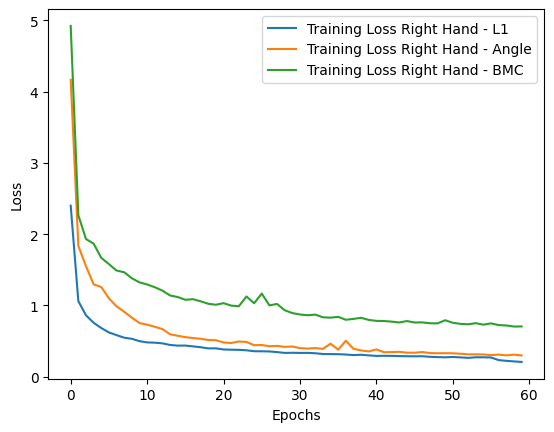

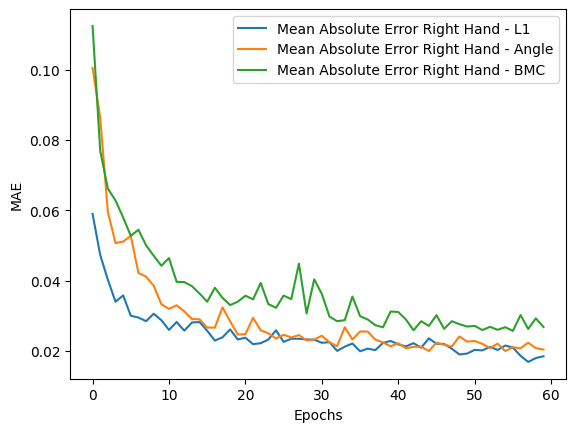

In [10]:
for idx, key in enumerate(t_info.keys()):
    # if idx == 0:
    #     continue
    # Plot loss and root mean square error
    # Plot training loss
    training_info = t_info[key]
    plt.plot(training_info["loss"], label=f"Training Loss {key}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
plt.legend()
plt.show()

for idx, key in enumerate(t_info.keys()):
    # Plot validation accuracy
    # if idx == 0:
    #     continue
    training_info = t_info[key]
    plt.plot(training_info["mae"], label=f"Mean Absolute Error {key}")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
plt.legend()
plt.show()

-----------------------Right Hand - L1-----------------------


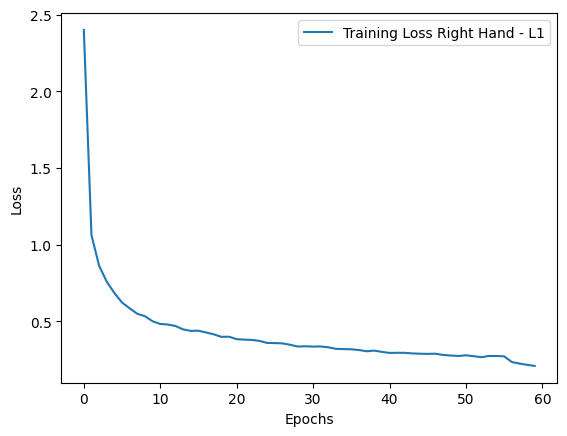

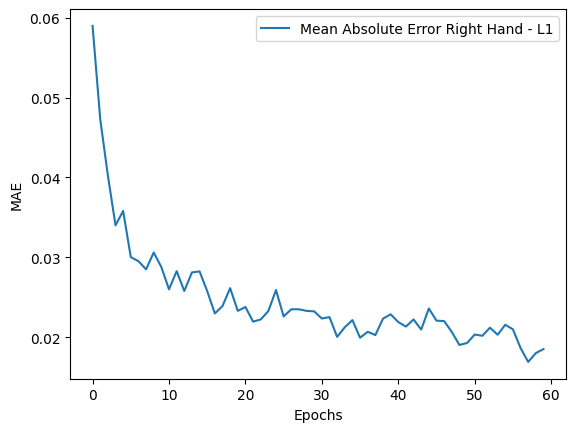

-----------------------Right Hand - Angle-----------------------


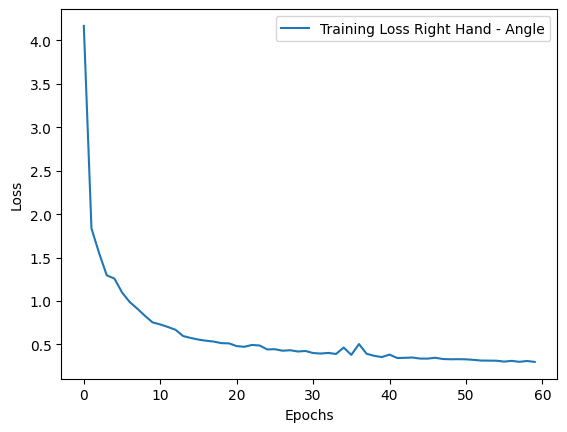

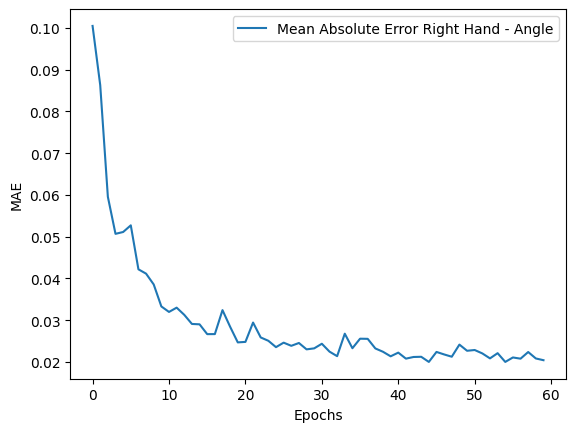

-----------------------Right Hand - BMC-----------------------


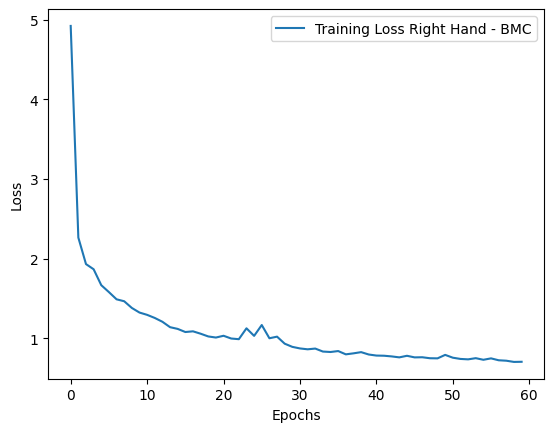

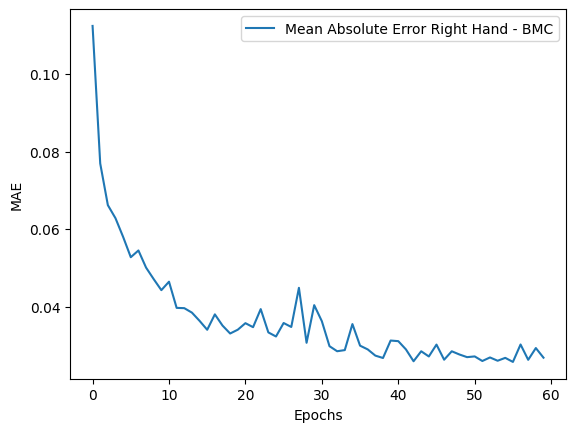

In [11]:
for idx, key in enumerate(t_info.keys()):
    print(f"-----------------------{key}-----------------------")
    training_info = t_info[key]
    plt.plot(training_info["loss"], label=f"Training Loss {key}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    plt.plot(training_info["mae"], label=f"Mean Absolute Error {key}")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.legend()
    plt.show()

# Validation

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:11<00:00,  8.38it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.01125113945454359, 0.004830519203096628, 0.0417620986700058, 0.08633437752723694, 0.0222175233066082, 0.055261772125959396, 0.007155950181186199, 0.041830334812402725, 0.06315196305513382, 0.006805742625147104, 0.007753397338092327, 0.008639459498226643, 0.016449585556983948, 0.04544813558459282, 0.03600361943244934, 0.0088136475533247, 0.02008972503244877, 0.03255447372794151, 0.011368007399141788, 0.02659161388874054, 0.007836801931262016, 0.06228523701429367, 0.019613197073340416, 0.041982121765613556, 0.006173702888190746, 0.009597613476216793, 0.02539309859275818, 0.011578304693102837, 0.008186941035091877, 0.007852391339838505, 0.00928663369268179, 0.008404380641877651, 0.014670786447823048, 0.00828199740499258, 0.021572140976786613, 0.035205598920583725, 0.03835086151957512, 0.01920139603316784, 0.00878653209656477, 0.016053711995482445, 0.028742758557200432, 0.031700003892183304, 0.004999799653887749, 0.021132932975888252, 0.010597947984933853, 0.04752645641565323, 0.0121824

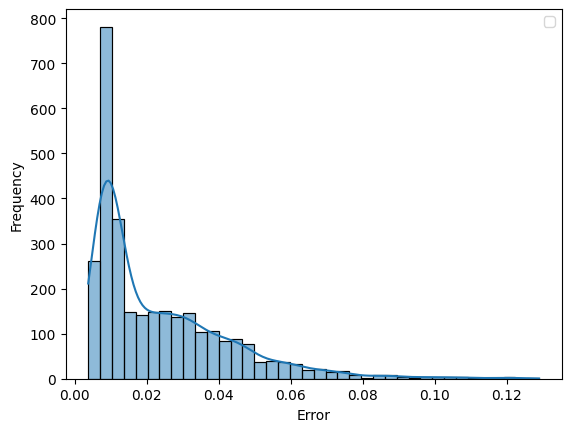

(3000, 21, 3)


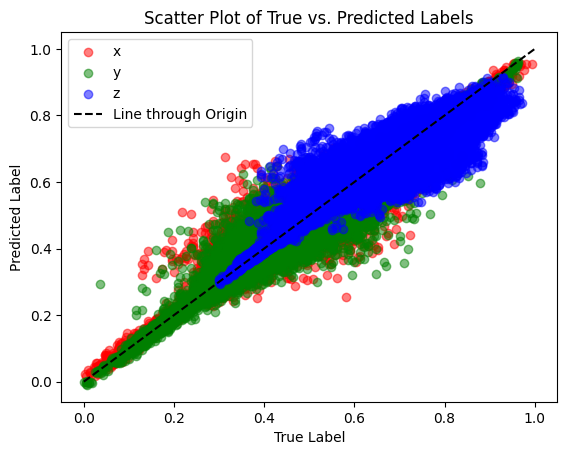

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:09<00:00, 10.35it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.02806776389479637, 0.01221616193652153, 0.061360761523246765, 0.014043442904949188, 0.021631471812725067, 0.026834120973944664, 0.029996585100889206, 0.04334791377186775, 0.009409409947693348, 0.020428400486707687, 0.010986600071191788, 0.0153622692450881, 0.010367702692747116, 0.03222458437085152, 0.01587620936334133, 0.0843459814786911, 0.010740324854850769, 0.009616028517484665, 0.012963427230715752, 0.05001426860690117, 0.011805789545178413, 0.025038443505764008, 0.023175928741693497, 0.018506266176700592, 0.03663095831871033, 0.04313456639647484, 0.03559331223368645, 0.017482956871390343, 0.01699485443532467, 0.00911477766931057, 0.020340243354439735, 0.014459843747317791, 0.023789873346686363, 0.011350193992257118, 0.020468829199671745, 0.017002740874886513, 0.029647832736372948, 0.05612387880682945, 0.006517562549561262, 0.08343113958835602, 0.015603844076395035, 0.007944026961922646, 0.010763224214315414, 0.01579737663269043, 0.01769743673503399, 0.05239721015095711, 0.03944

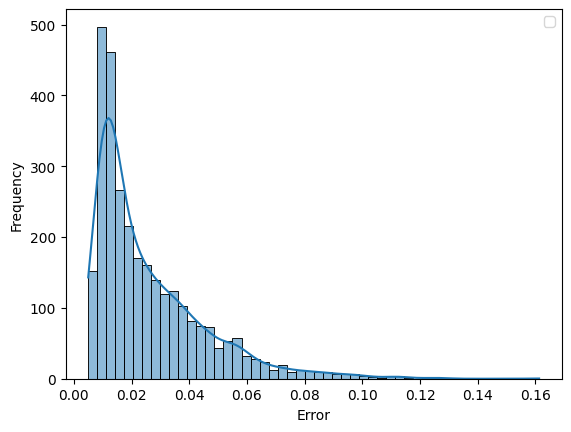

(3000, 21, 3)


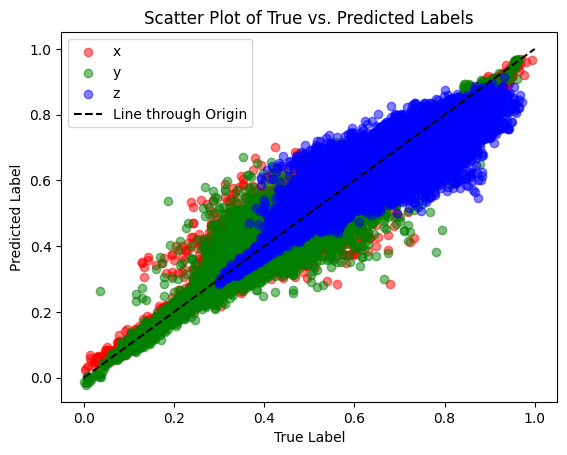

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:09<00:00, 10.33it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.0338442325592041, 0.01152628194540739, 0.015909500420093536, 0.015026156790554523, 0.03680435195565224, 0.03731149062514305, 0.018504125997424126, 0.018817612901329994, 0.05133536085486412, 0.10632960498332977, 0.061629828065633774, 0.01564437709748745, 0.018904859200119972, 0.04761059209704399, 0.015698010101914406, 0.015029228292405605, 0.04529209062457085, 0.014640924520790577, 0.01579599268734455, 0.02071855030953884, 0.056666336953639984, 0.01976064033806324, 0.04500586912035942, 0.035789214074611664, 0.02190648578107357, 0.01459444034844637, 0.047168850898742676, 0.021523132920265198, 0.037959225475788116, 0.011969448067247868, 0.01352634560316801, 0.02952261082828045, 0.014606164768338203, 0.031230827793478966, 0.03714269772171974, 0.043926432728767395, 0.1126827597618103, 0.015362021513283253, 0.08002470433712006, 0.02587057463824749, 0.02127811871469021, 0.04491128399968147, 0.03375563025474548, 0.01563551276922226, 0.02413109317421913, 0.020346861332654953, 0.0153658865019

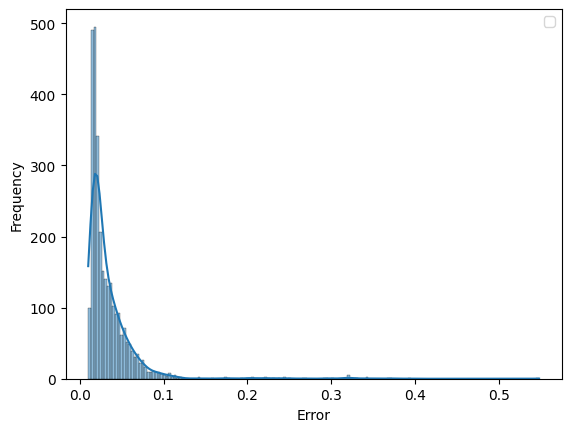

(3000, 21, 3)


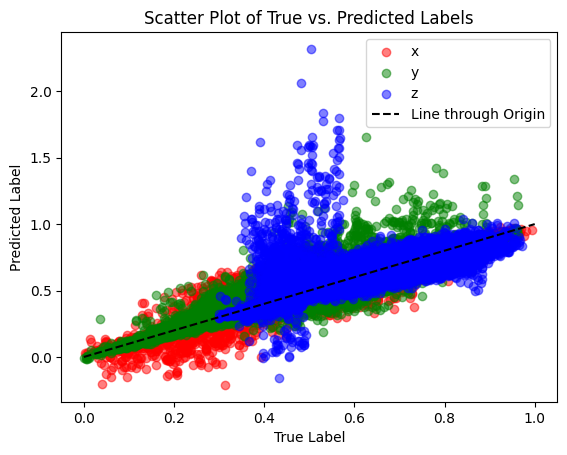

In [12]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    import numpy as np

    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c="r", label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c="g", label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c="b", label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color="black", linestyle="--", label="Line through Origin")
    plt.legend()
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Scatter Plot of True vs. Predicted Labels")
    plt.show()

In [13]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

In [14]:
old_model = model

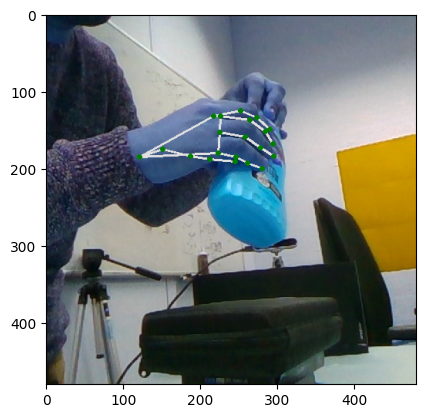

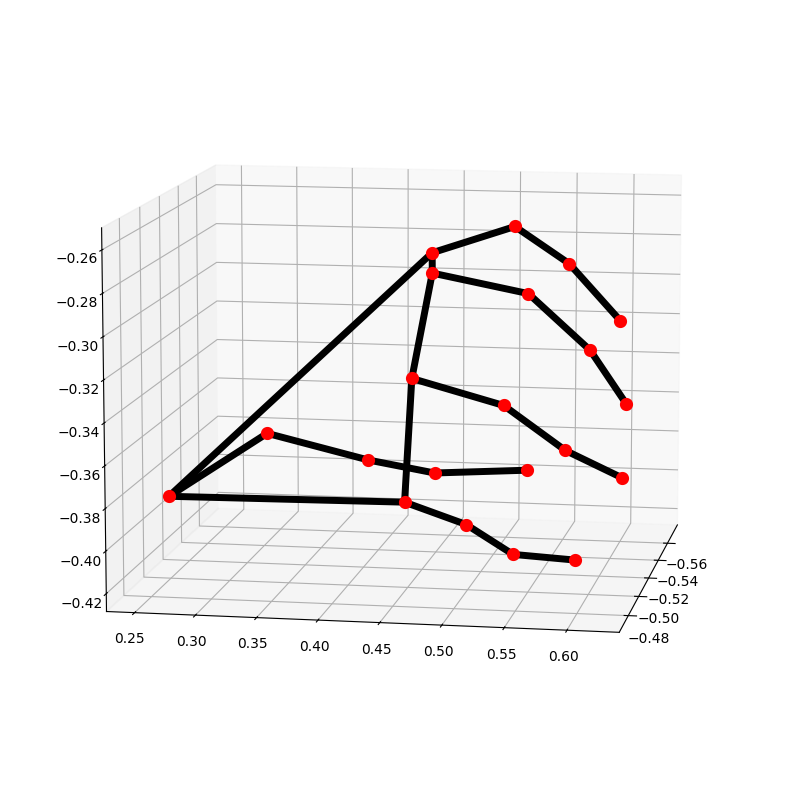

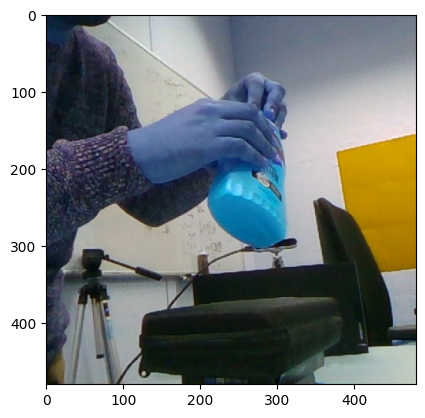

In [56]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models
from importlib import reload

# reload(models)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00000099.jpg"
# file = "/home/devcontainers/third-year-project/data/EgoDexter/data/Fruits/color/image_00100_color.png"
# file = "/home/devcontainers/third-year-project/data/HO3D_Cropped/right/00003.jpg"
import random
file = val_subset.dataset.paths[random.choice(val_subset.indices)]

image = Image.open(file)
model = saved_models[1]
# model = models.OccModel().to(device)

# model.load_state_dict(torch.load("models/points_20240103-024547.pt"))
# model.load_state_dict(torch.load("models/points_20240104-022118.pt"))
# model = old_model
model.eval()
transform = transforms.Compose(
    {
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    }
)

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))

# print(joints[0])


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(landmarks, landmark_pb2.NormalizedLandmarkList())

# img = cv2.imread(file)
img2 = cv2.imread(file)
# img2.show()
# img2 = np.array(image * 255)
# img2 = cv2.resize(img2, (224,224))
# mp_drawing.draw_landmarks(
#             img,
#             hand_landmarks,
#             mp_hands.HAND_CONNECTIONS,
#             mp_drawing_styles.get_default_hand_landmarks_style(),
#             mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
# plt.imshow(img)
# plt.show()
plt.imshow(img2)
plt.show()

mp_drawing.plot_landmarks(hand_landmarks, mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.imread(file))

Save Validation Set for Testing

In [16]:
with open("val_paths.txt", "w") as f:
    for idx in tqdm(val_subset.indices, total=len(val_subset.indices)):
        f.write(f"{val_subset.dataset.paths[idx]}\n")
    

100%|██████████| 3000/3000 [00:00<00:00, 544974.32it/s]
